In [1]:
import os

def listar(de):
    #Variable para la ruta al directorio
    path = de
 
    #Lista vacia para incluir los ficheros
    name = []
 
    #Lista con todos los ficheros del directorio:
    lstDir = os.walk(path)   #os.walk()Lista directorios y ficheros
    #Crea una lista de los ficheros png que existen en el directorio y los incluye a la lista.
    i=0
    for root, dirs, files in lstDir:
        for fichero in files:
            (nombreFichero, extension) = os.path.splitext(fichero)
            if(extension == ".png"):
                name.append(nombreFichero)
        i += 1
        if i >= 1:
            break
    return name

In [2]:
#Importar las librerias

import numpy as np

from skimage import data, exposure, img_as_float
from skimage import io, color, filters
from skimage import util

path='10X'

name = listar(path)

for i in range(len(name)):
    img = io.imread(path+"/"+name[i]+'.png')  #leer Imagen 10X
#img = io.imread("a-16001-20x-mac-3.png")  #leer Imagen 20X (1,2,3,4,5,6)
#img = io.imread("prueba.png")  #leer Imagen 20X
#img = io.imread("a-16002-40x-mac-01.png")  #leer Imagen 40X (01,02,03)

#print(img.dtype)  #imprimir tipo de dato de la imagen
    
    histo=exposure.histogram(img[:, :, 0])

    a=histo[1].min()
    a1=histo[1].max()

    histo=exposure.histogram(img[:, :, 1])

    b=histo[1].min()
    b1=histo[1].max()

    histo=exposure.histogram(img[:, :, 2])

    c=histo[1].min()
    c1=histo[1].max()

#Intento 1
    if(path=='10X'):
        img[:, :, 0]= exposure.rescale_intensity(img[:, :, 0], in_range=(a1-(1*a), a1)) # 10X=1 / 20X=0.4 / 40x=0.7
        img[:, :, 1]= exposure.rescale_intensity(img[:, :, 1], in_range=(b1-(2*b), b1))   # 10X=2 / 20X=1   / 40x=1.2
        img[:, :, 2]= exposure.rescale_intensity(img[:, :, 2], in_range=(c1-(4.5*c), c1))   # 10X=4.5 / 20X=12   / 40x=4
    
    if(path=='20X'):
        img[:, :, 0]= exposure.rescale_intensity(img[:, :, 0], in_range=(a1-(0.4*a), a1)) # 10X=1 / 20X=0.4 / 40x=0.7
        img[:, :, 1]= exposure.rescale_intensity(img[:, :, 1], in_range=(b1-(1*b), b1))   # 10X=2 / 20X=1   / 40x=1.2
        img[:, :, 2]= exposure.rescale_intensity(img[:, :, 2], in_range=(c1-(12*c), c1))   # 10X=4.5 / 20X=12   / 40x=4

    if(path=='40X'):
        img[:, :, 0]= exposure.rescale_intensity(img[:, :, 0], in_range=(a1-(0.7*a), a1)) # 10X=1 / 20X=0.4 / 40x=0.7
        img[:, :, 1]= exposure.rescale_intensity(img[:, :, 1], in_range=(b1-(1.2*b), b1))   # 10X=2 / 20X=1   / 40x=1.2
        img[:, :, 2]= exposure.rescale_intensity(img[:, :, 2], in_range=(c1-(2*c), c1))   # 10X=4.5 / 20X=12   / 40x=4
    
    io.imshow(img)
    io.show()

    io.imsave(path+'/linealizacion/'+name[i]+'_linealize_hist.png',(img)) #guardar la imagen con linealizado

In [3]:
# Expansión de contraste

import numpy as np

from skimage import io, color, filters

path = '10X/linealizacion'

name = listar(path)
for i in range(len(name)):
    img = io.imread(path+"/"+name[i]+'.png')
    dat = np.array(img)+.0
    sol = np.empty_like(img) #matriz de ceros

    #formula de Expansión de contraste (255*(imagen-min))/(max-min)

    sol = np.divide(np.multiply(255,np.subtract(img,img.min(),dtype=float),dtype=float),np.subtract(img.max(),img.min(),dtype=float),dtype=float)

    sol = np.uint8(sol) #de Numpy a uint8
    io.imshow(sol)
    io.show()

    io.imsave("C://Users/Daniers/Documents/Daniers96-analisis-morfometrico-histologia-peces-hibridos-94e936a54bf8/10X/normalizacion/"+name[i]+'_norma.png',(sol))

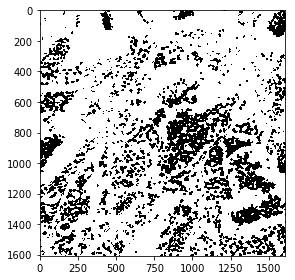

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, exposure, img_as_float
from skimage import io, color, filters
from skimage.filters import threshold_otsu
from skimage import util
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

path = '10X/normalizacion'

name = listar(path)
for i in range(len(name)):
    ihc_rgb = io.imread(path+"/"+name[i]+'.png')
    ihc_hed = rgb2hed(ihc_rgb)

    ihc_hed_np = np.array(ihc_hed)

    th = threshold_otsu(ihc_hed_np[:,:,0])
    sol = ihc_hed_np[:,:,0] <= th
    
    io.imshow(sol)
    io.show()
    
    sol = np.array(sol*255)

    io.imsave("C://Users/Daniers/Documents/Daniers96-analisis-morfometrico-histologia-peces-hibridos-94e936a54bf8/10X/binario/"+name[i]+'_bin.png',(np.uint8(sol)))